In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage
import regex
import PIL
import imageio
import warnings
from skimage import color

In [2]:
#load in patient data
patient_data = pd.read_csv('data/patient_data.csv')
patient_data.head()

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0


In [3]:
# rootdir = rootdir = Path('data')
# scans = [f for f in rootdir.resolve().glob('**/*[!mask].tif')]
# masks = [f for f in rootdir.resolve().glob('**/*mask.tif')]
# all_files = [f for f in rootdir.resolve().glob('**/*.tif')]

In [102]:
files = []
#iterate through files in data folder
for dirpath, dirnames, filenames in os.walk('data'):
    for f in filenames:
        if f.endswith('.tif'):
            #create list of .tif filenames
            files.append(os.path.join(dirpath, f))
#create list of just mask filenames
masks = [f for f in files if regex.match('.*mask.tif$', f)]
#create list of just MRI filenames
scans = [f for f in files if regex.match('.*\d.tif$', f)]

In [5]:
#make a dictionary of all files for each patient
file_dict = {}
patient_list = os.listdir('data\lgg-mri-segmentation')
for i, name in enumerate(patient_list):
    pat_id = name[8:12]
    file_dict[pat_id] = [f for f in files if str(pat_id) in f]

In [6]:
#make a dictionary of MRIs for each patient
scan_dict = {}
for key, vals in file_dict.items():
    pat_files = [f for f in scans if key in f]
    #order by scan number
    sorted_scans = sorted(pat_files, key=lambda x: int(x[-5] if len(x) == 75 else x[-6:-4]))
    scan_dict[key] = sorted_scans

In [7]:
#make a dictionary of masks for each patient
mask_dict = {}
for key, vals in file_dict.items():
    pat_files = [f for f in masks if key in f]
    #order by mask number
    sorted_masks = sorted(pat_files, key=lambda x:  int(x[-10] if len(x) == 80 else x[-11:-9]))
    mask_dict[key] = sorted_masks

In [8]:
#zip together MRIs and masks for each patient
zipped_dict = {}
for pat_id in file_dict.keys():
    zipped_dict[pat_id] = list(zip(scan_dict[pat_id],mask_dict[pat_id]))

In [168]:
def show_images(files, nrows, ncols):
    fig = plt.figure(figsize=(20,15))
    for i, file in enumerate(files):
        fig.add_subplot(nrows, ncols, i+1)
        img= plt.imread(file)
        plt.imshow(img)
        plt.axis('off')

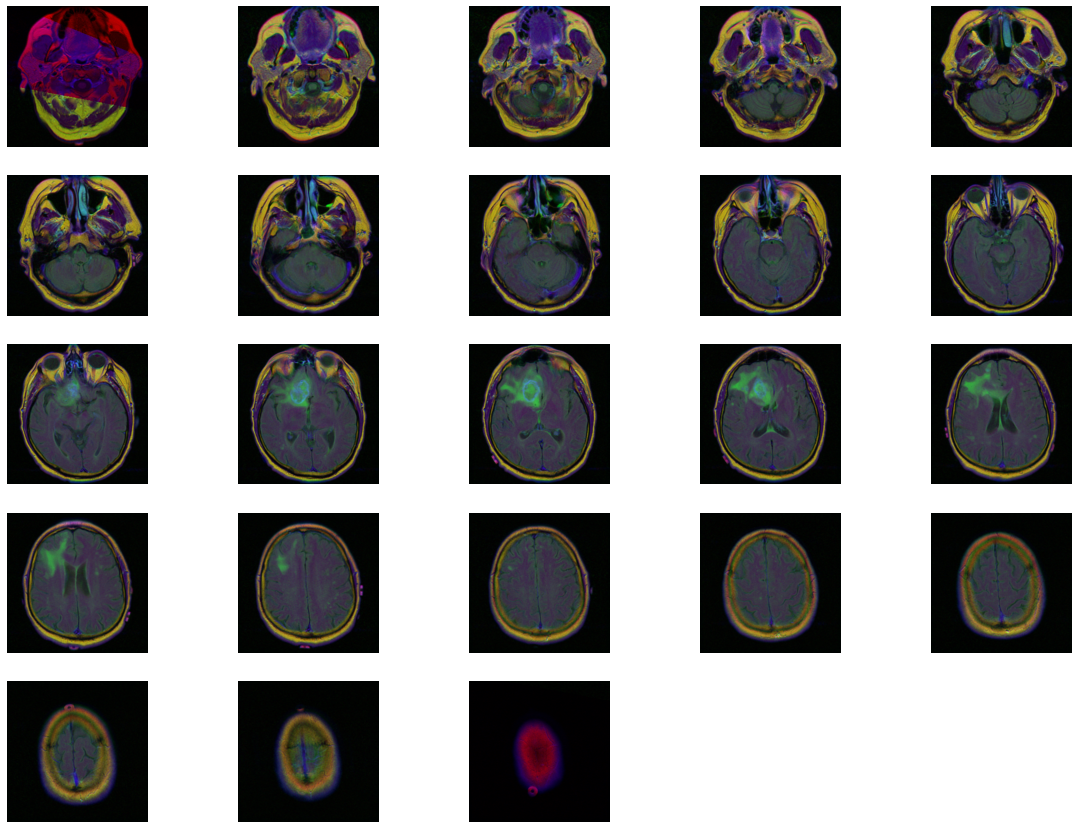

In [182]:
show_images(scan_dict['4941'], nrows=5, ncols=5)

In [16]:
#make a function to plot MRIs and masks 
def show_scans_masks(files):
    for tup in files:
        scan_file, mask_file = tup
        img = plt.imread(scan_file)
        mask = plt.imread(mask_file)
        fig, axes = plt.subplots(nrows=1, ncols=2)
        axes[0].imshow(img)
        axes[1].imshow(mask)
        axes[0].axis('off')
        axes[1].axis('off')
        warnings.filterwarnings("ignore", category=RuntimeWarning)

In [184]:
#sort scans and masks by image sequence number
sorted_scans = sorted(scans, key=lambda x: int(x[-5] if len(x) == 75 else x[-6:-4]))
sorted_masks = sorted(masks, key=lambda x:  int(x[-10] if len(x) == 80 else x[-11:-9]))
masks_and_scans = list(zip(sorted_scans, sorted_masks))

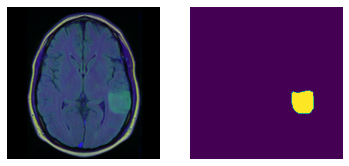

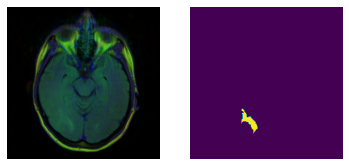

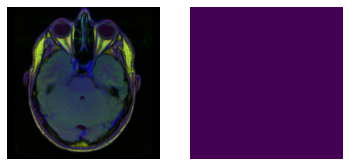

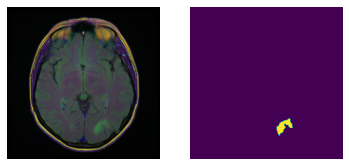

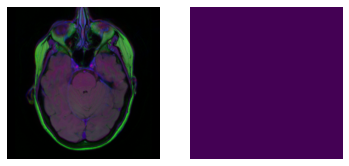

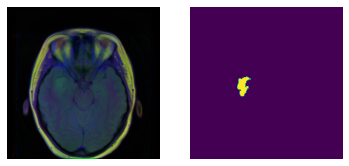

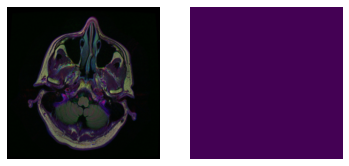

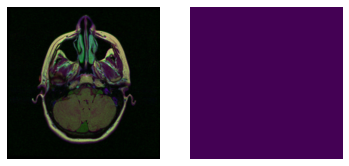

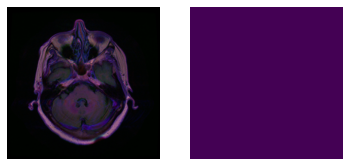

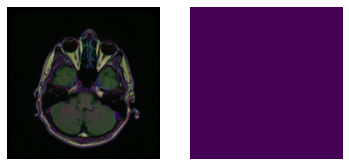

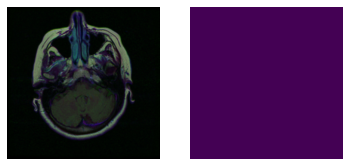

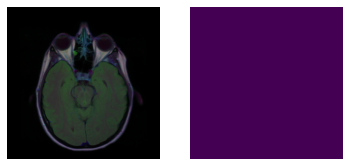

In [186]:
show_scans_masks(masks_and_scans[1000:1012])

In [84]:
#make function to overlay mri and mask
def overlay(files, rows, cols):
    fig= plt.figure(figsize=(10,10))
    for i,file in enumerate(files):
        fig.add_subplot(rows,cols,i+1)
        img, mask = file
        img = plt.imread(img)
        mask = plt.imread(mask)
        plt.imshow(img)
        plt.imshow(mask, alpha=.4)
    plt.tight_layout()

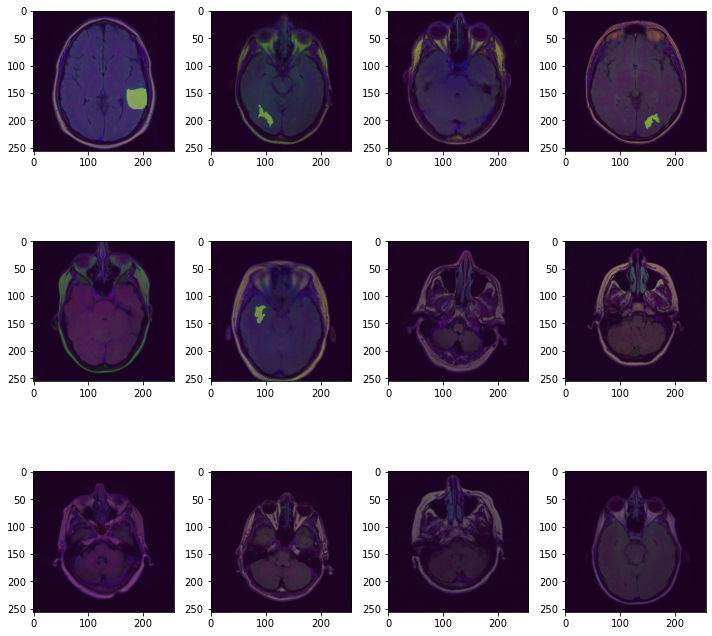

In [85]:
overlay(masks_and_scans[1000:1012], rows=3, cols=4)

In [173]:
#make a function to show mri, mask, and overlay
def plot_all(files):
    for file in files:
        img, mask = file
        img = plt.imread(img)
        mask = plt.imread(mask)
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
        ax[0].imshow(img)
        ax[1].imshow(mask)
        ax[2].imshow(img)
        ax[2].imshow(mask, alpha=.4)
        plt.show()

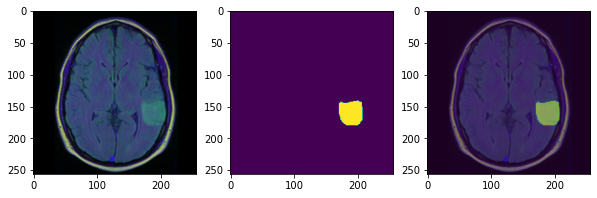

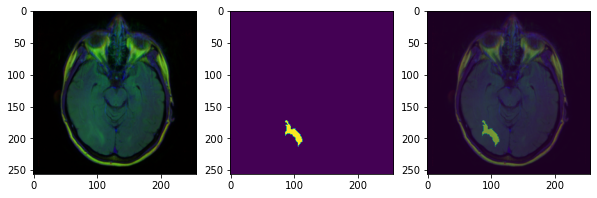

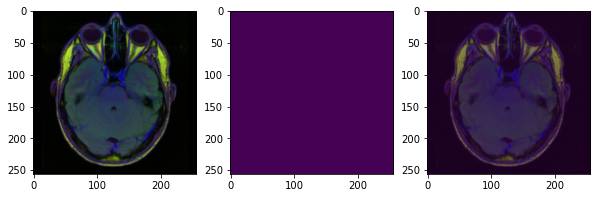

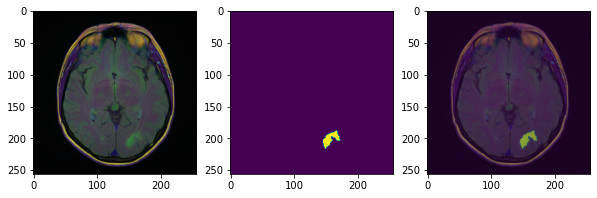

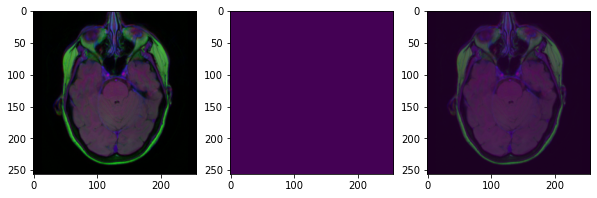

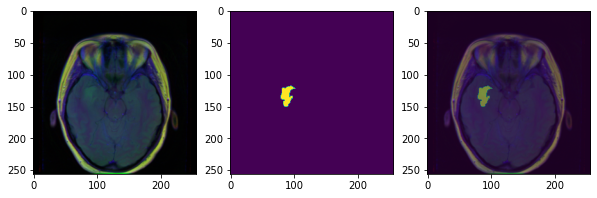

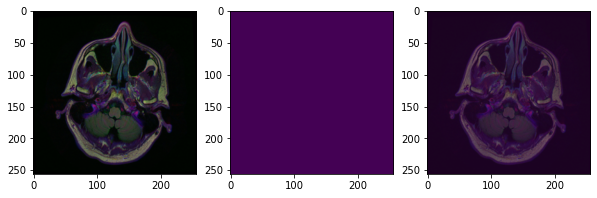

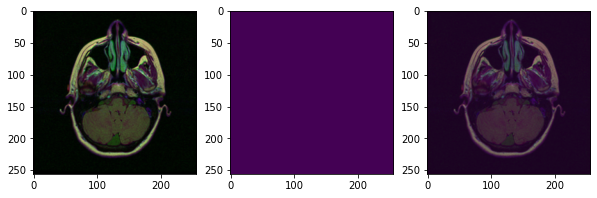

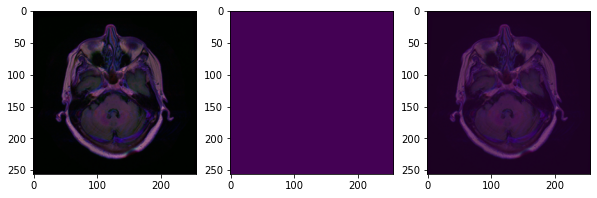

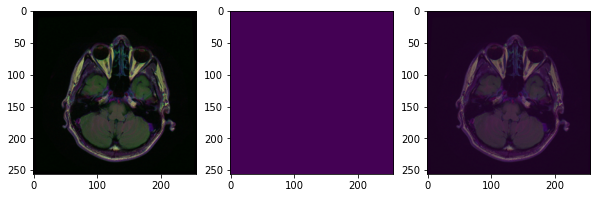

In [174]:
plot_all(masks_and_scans[1000:1010])

In [189]:
#make a dataframe of all mris and corresponding masks
df = pd.DataFrame(scans,masks).reset_index()

In [190]:
df.columns = ['scans', 'masks']

In [191]:
df

,scans,masks
0,data\lgg-mri-segmentation\TCGA_CS_4941_1996090...,data\lgg-mri-segmentation\TCGA_CS_4941_1996090...
1,data\lgg-mri-segmentation\TCGA_CS_4941_1996090...,data\lgg-mri-segmentation\TCGA_CS_4941_1996090...
2,data\lgg-mri-segmentation\TCGA_CS_4941_1996090...,data\lgg-mri-segmentation\TCGA_CS_4941_1996090...
3,data\lgg-mri-segmentation\TCGA_CS_4941_1996090...,data\lgg-mri-segmentation\TCGA_CS_4941_1996090...
4,data\lgg-mri-segmentation\TCGA_CS_4941_1996090...,data\lgg-mri-segmentation\TCGA_CS_4941_1996090...
...,...,...
3924,data\lgg-mri-segmentation\TCGA_HT_A61B_1999112...,data\lgg-mri-segmentation\TCGA_HT_A61B_1999112...
3925,data\lgg-mri-segmentation\TCGA_HT_A61B_1999112...,data\lgg-mri-segmentation\TCGA_HT_A61B_1999112...
3926,data\lgg-mri-segmentation\TCGA_HT_A61B_1999112...,data\lgg-mri-segmentation\TCGA_HT_A61B_1999112...
3927,data\lgg-mri-segmentation\TCGA_HT_A61B_1999112...,data\lgg-mri-segmentation\TCGA_HT_A61B_1999112...


In [192]:
df.to_csv('data\path_df.csv')